## One-Way Anova

## 1. Generating data

In [14]:
# Importations

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# Generating dummy data

# Setting the random seed - reproducibility
np.random.seed(42)

# Generating three groups with different means - mean = 50/55/60 std = 5 samples = 30
group_1 = np.random.normal(loc = 50, scale = 5, size = 30)
group_2 = np.random.normal(loc = 55, scale = 5, size = 30)
group_3 = np.random.normal(loc = 60, scale = 5, size = 30)

In [12]:
# Checking how concatenation works - it combines the generated data into a 1-dimensional array

np.concatenate([group_1, group_2, group_3]).shape

(90,)

In [13]:
# Creating a dataframe from the generated data

data = pd.DataFrame({
    "values": np.concatenate([group_1, group_2, group_3]) , 
    "groups": ["Group 1"]*30 + ["Group 2"]*30 + ["Group 3"]*30
})
data.sample(7)

,values,groups
41,55.856841,Group 2
35,48.895782,Group 2
49,46.184799,Group 2
52,51.615390,Group 2
65,66.781200,Group 3
44,47.607390,Group 2
13,40.433599,Group 1


## 2. Visualizing the data

# 📊 Understanding Box Plots

Box plots (also called **box-and-whisker plots**) are used to visualize the distribution of data. Apart from detecting **outliers**, they also provide insights into:

### 1️⃣ Data Distribution & Spread  
   - Box plots summarize data using five key statistics:  
     - **Minimum** (smallest non-outlier value)  
     - **First Quartile (Q1)** (25th percentile)  
     - **Median (Q2)** (50th percentile)  
     - **Third Quartile (Q3)** (75th percentile)  
     - **Maximum** (largest non-outlier value)  

### 2️⃣ Central Tendency  
   - The **median** (Q2) is shown as a line inside the box, representing the central value of the dataset.  

### 3️⃣ Variability (Interquartile Range, IQR)  
   - The **Interquartile Range (IQR)** is calculated as:  
     \[
     IQR = Q3 - Q1
     \]
   - A larger IQR indicates more spread in the middle 50% of the data.  

### 4️⃣ Skewness & Symmetry  
   - **Symmetric data** → Median is centered inside the box.  
   - **Right-skewed data** → Median is closer to Q1, with a longer upper whisker.  
   - **Left-skewed data** → Median is closer to Q3, with a longer lower whisker.  

### 5️⃣ Comparison Between Groups  
   - Multiple box plots can be plotted together to compare different categories or datasets.  
   - Useful for visualizing differences in distributions across groups.  

### 6️⃣ Presence of Clusters or Gaps  
   - Large **gaps** between quartiles or whiskers indicate areas where data is sparse.  
   - **Clusters** can be inferred when certain quartiles are compressed together.  

---
✅ **Key Takeaway**: Box plots provide a compact yet powerful summary of a dataset's **spread, central tendency, skewness, and variability**, making them great for exploratory data analysis (EDA).  


In [20]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

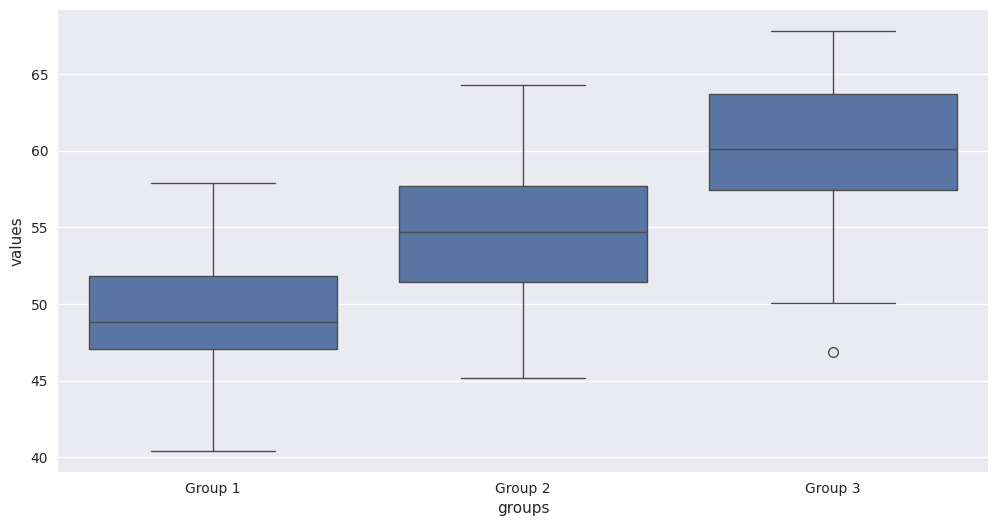

In [21]:
# Creating box plots

with plt.style.context("seaborn-v0_8"):
    plt.figure(figsize = (12, 6))
    sns.boxplot(x = "groups", y = "values", data = data)

## One Way Anova

Hypothesis
----------

- H0 => mean of group 1 = mean of group 2 = mean of group 3
- Ha => at least one mean is different

In [26]:
# Anova test
from scipy.stats import f_oneway

# Initiliazing the anova test
F_statistic, p_value = f_oneway(group_1, group_2, group_3)
print(f"F-statistic\t = {F_statistic}\np-value\t\t = {p_value}")

F-statistic	 = 40.97563597701798
p-value		 = 2.89376813507169e-13


In [27]:
# Interpretation of the anova test

# Setting our significance level
alpha = 0.05

# Logic
if p_value < alpha:
    print("Rejection of the null hypothesis: At least one mean is different")
else:
    print("Failure to reject the null hypothesis: Means are the same")

Rejection of the null hypothesis: At least one mean is different


## Post-Hoc Analysis

- When the Anova test is completed and we reject the null Hypothesis (Meaning at least one group mean differs) Post-Hoc analysis is used to determine which specific groups differ

Types of Post-Hoc Test
----------------------
1. Tukey's Honestly significant difference(HSD) - most commony used
2. Bonferroni Correction - Adjust significance level to control false positives
3. Scheffe's test - More conservative, good for unequal sample sizes
4. Dunn's test - Used for non-parametric ANOVA(Kruskall Wallis test)


- We will focus on  the Post-Hoc in this example

Tukey's honestly significant difference (Tukey's HSD)
-----------------------------------------------------

  `statsmodels.stats.multicomp.pairwise_tukeyhsd`

- Compares all positive pairs of groups while adjusting for mutiple comparisons
- It helps determine which groups differ significantly


Steps using python
------------------

## 📊 Tukey HSD Analysis

```python
# Importing the required library
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Instantiations
tukey = pairwise_tukeyhsd(data["values"], data["groups"], alpha=0.05)

# Display results
print(tukey)

## 📊 Tukey HSD Results

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
=====================================================
 group1  group2 meandiff p-adj  lower   upper  reject
-----------------------------------------------------
Group 1 Group 2   5.3349 0.0001 2.4357  8.2341   True
Group 1 Group 3  11.0052    0.0  8.106 13.9044   True
Group 2 Group 3   5.6702    0.0  2.771  8.5694   True
-----------------------------------------------------
# Plotting the results
tukey.plot_simultaneous()
plt.show()


## 🎯 Interpreting Results  

### 📌 Key Terms  

- **🟢 group1 & group2** → The two groups being compared  
- **🔵 meandiff** → The difference between the two groups in comparison  
- **🟣 p-adj** → Adjusted p-value (to control for multiple comparisons)  
- **🟠 lower & upper** → The confidence intervals for the mean difference  
- **🔴 reject** → If **True**, the difference is **statistically significant**  


## Visualizing the tukey plot interpretation

- This plot shows confidence interval for each comparison
- If the confidence intervals do not overlap, the difference is significant

## Decision Rule 
- If p-adj < 0.05(the threshhold we select), reject the null hypothesis meaning the groups are significantly different
- if p-adj >= 0.05, we fail to reject the null hypothesis meaning the difference is not statistically significant

## Note: Confidence interval overlap

Example of a confidence interval overlap
----------------------------------------
Group 1: (45, 55)  

Group 2: (50, 60)  

Example of a confidence interval non-overlap
--------------------------------------------
Group 1: (45, 55)

Group 2: (60, 70)

In [36]:
# Tukey HSD Analysis
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Instantiations
tukey = pairwise_tukeyhsd(data["values"], data["groups"], alpha = 0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj  lower   upper  reject
-----------------------------------------------------
Group 1 Group 2   5.3349 0.0001 2.4357  8.2341   True
Group 1 Group 3  11.0052    0.0  8.106 13.9044   True
Group 2 Group 3   5.6702    0.0  2.771  8.5694   True
-----------------------------------------------------


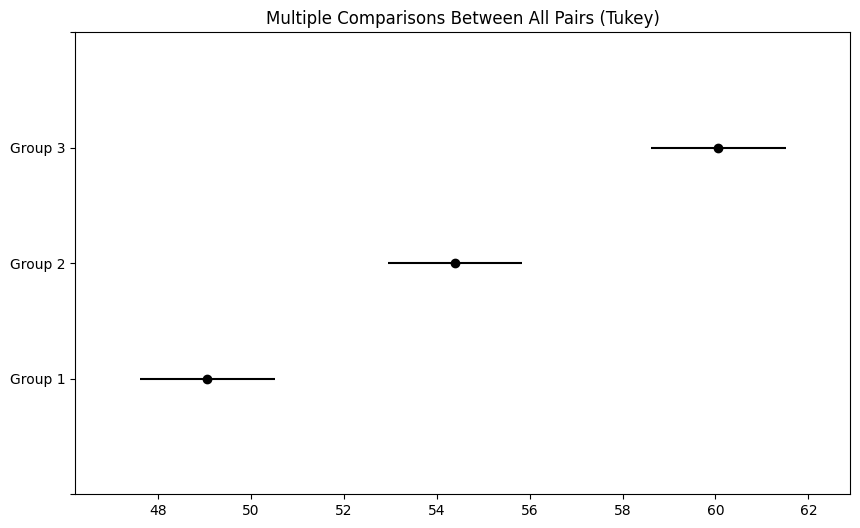

In [38]:
# Plotting the results
tukey.plot_simultaneous()
plt.show()

## Conclusion 

1. The One-Way anova test suggested that there is a significant difference in means of groups
2. The post Hoc analysis suggested all the means are different